In [1]:
import os
import numpy as np
import rasterio
import matplotlib.pyplot as plt

# 📂 Directorios de imágenes y máscaras
imagenes_dir = r"E:\Memoria\CNN\Originales\TIFF\RM"
mascaras_dir = r"E:\Memoria\CNN\Originales\TIFF\ground_truth"

# 🔍 Obtener lista de archivos TIFF
imagenes_files = sorted([f for f in os.listdir(imagenes_dir) if f.endswith(".tif")])
mascaras_files = sorted([f for f in os.listdir(mascaras_dir) if f.endswith(".tif")])

# 🔄 Verificar que las imágenes y máscaras coincidan
imagenes_dict = {f.replace(".tif", ""): f for f in imagenes_files}
mascaras_dict = {f.replace("_ground_truth.tif", ""): f for f in mascaras_files}

# 🔍 Archivos que tienen correspondencia
paired_files = sorted(set(imagenes_dict.keys()) & set(mascaras_dict.keys()))
imagenes_sin_mascara = sorted(set(imagenes_dict.keys()) - set(mascaras_dict.keys()))
mascaras_sin_imagen = sorted(set(mascaras_dict.keys()) - set(imagenes_dict.keys()))

print(f"📂 Imágenes disponibles: {len(imagenes_files)}")
print(f"📂 Máscaras disponibles: {len(mascaras_files)}")
print(f"✅ Pares encontrados: {len(paired_files)}")
print(f"⚠️ Imágenes sin máscara: {imagenes_sin_mascara}")
print(f"⚠️ Máscaras sin imagen: {mascaras_sin_imagen}")



📂 Imágenes disponibles: 62
📂 Máscaras disponibles: 62
✅ Pares encontrados: 62
⚠️ Imágenes sin máscara: []
⚠️ Máscaras sin imagen: []


In [4]:
# 🔄 Verificar dimensiones y valores de píxeles
def analizar_archivo(ruta):
    with rasterio.open(ruta) as src:
        data = src.read(1)  # Leer la primera banda
        shape = data.shape  # Dimensiones
        min_val = np.min(data)
        max_val = np.max(data)
        unique_vals = np.unique(data) if data.size < 1e6 else "Muchos valores únicos"
        crs = src.crs  # Sistema de referencia espacial
        return shape, min_val, max_val, unique_vals, crs

# 🔍 Análisis de imágenes y máscaras
dimensiones_imagenes = set()
dimensiones_mascaras = set()
valores_unicos_mascaras = set()

for img_name in paired_files:
    img_path = os.path.join(imagenes_dir, imagenes_dict[img_name])
    mask_path = os.path.join(mascaras_dir, mascaras_dict[img_name])

    # 📊 Analizar imagen
    img_shape, img_min, img_max, _, img_crs = analizar_archivo(img_path)
    dimensiones_imagenes.add(img_shape)

    # 📊 Analizar máscara
    mask_shape, mask_min, mask_max, mask_vals, mask_crs = analizar_archivo(mask_path)
    dimensiones_mascaras.add(mask_shape)
    valores_unicos_mascaras.update(mask_vals)

# 📊 Mostrar resultados
print(f"\n📏 Dimensiones encontradas en imágenes: {dimensiones_imagenes}")
print(f"📏 Dimensiones encontradas en máscaras: {dimensiones_mascaras}")
valores_unicos_numericos = [v for v in valores_unicos_mascaras if isinstance(v, (int, float))]
print(f"📊 Valores únicos en máscaras: {sorted(valores_unicos_numericos) if valores_unicos_numericos else 'Muchos valores únicos'}")


📏 Dimensiones encontradas en imágenes: {(1204, 1715), (1663, 2704), (602, 858), (604, 860), (1209, 1720), (3325, 5408), (9669, 13759), (831, 1352), (4835, 6879), (301, 429), (4816, 6860), (2408, 3430), (2417, 3440)}
📏 Dimensiones encontradas en máscaras: {(4244, 6045), (2110, 3002), (535, 759), (2118, 3012), (2126, 3023), (1073, 1520), (531, 755), (533, 758), (2127, 3027), (4237, 6024), (2130, 3026), (1063, 1509), (1062, 1510), (4265, 6061), (1059, 1508), (2137, 3034), (534, 759), (2116, 3011), (739, 1195), (1070, 1517), (2125, 3017), (1065, 1512), (1064, 1510), (2131, 3027), (1058, 1506), (1063, 1511), (2123, 3025), (1057, 1504), (1072, 1520), (2120, 3011), (2129, 3023), (1068, 1516), (4268, 6059), (534, 758), (739, 1194), (1476, 2387), (2142, 3038), (2121, 3018), (1066, 1515), (8574, 12159), (1069, 1517), (2130, 3027), (2934, 4765), (2132, 3030), (1062, 1508), (1479, 2388), (4265, 6056), (2138, 3034), (1480, 2390), (1059, 1506), (1476, 2386), (8560, 12144), (266, 378)}
📊 Valores úni

In [6]:
import os
import random
import numpy as np
import rasterio

# 📂 Directorio donde están las máscaras
masks_dir = r"E:\Memoria\CNN\Originales\TIFF\ground_truth"

# Obtener todas las máscaras TIFF disponibles
mask_files = sorted([f for f in os.listdir(masks_dir) if f.endswith(".tif")])

# Seleccionar 5 archivos de máscara aleatorios (o menos si hay menos archivos)
muestras_a_revisar = random.sample(mask_files, min(5, len(mask_files)))

print("\n🔍 Revisando valores únicos en 5 muestras de máscaras:")
for mask_name in muestras_a_revisar:
    mask_path = os.path.join(masks_dir, mask_name)

    # Cargar la máscara con Rasterio
    with rasterio.open(mask_path) as src:
        mask = src.read(1)  # Leer la primera banda de la máscara

    # Obtener valores únicos en la máscara
    valores_unicos = np.unique(mask)
    print(f"📂 {mask_name} → Valores únicos: {valores_unicos}")



🔍 Revisando valores únicos en 5 muestras de máscaras:
📂 rm4_ground_truth.tif → Valores únicos: [0 2]
📂 rm7_ground_truth.tif → Valores únicos: [0 2]
📂 rm5_ground_truth.tif → Valores únicos: [0 2]
📂 des2_ground_truth.tif → Valores únicos: [0 1]
📂 car21_ground_truth.tif → Valores únicos: [0 3]


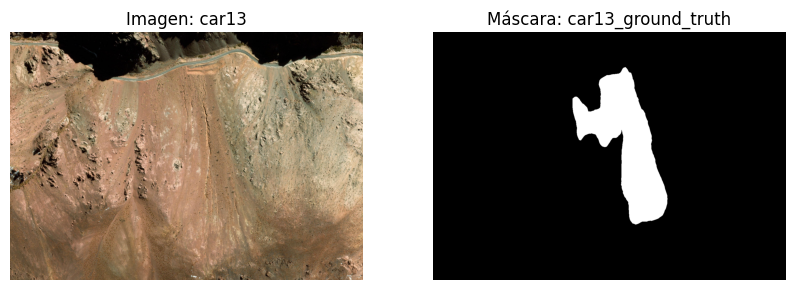

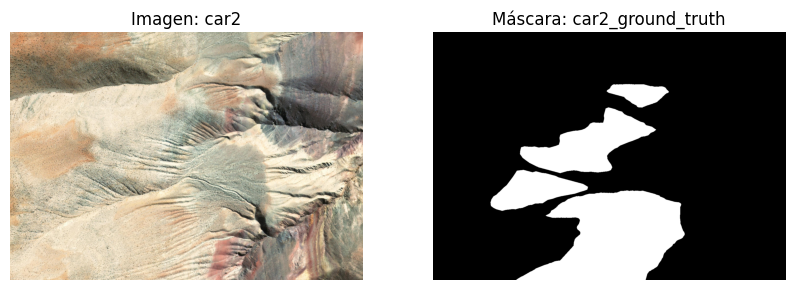

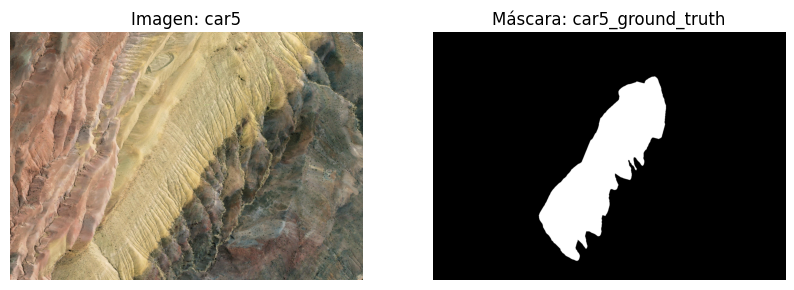

In [3]:
# 🔍 Visualización de ejemplos
def visualizar_muestra():
    sample_name = np.random.choice(paired_files)
    img_path = os.path.join(imagenes_dir, imagenes_dict[sample_name])
    mask_path = os.path.join(mascaras_dir, mascaras_dict[sample_name])

    with rasterio.open(img_path) as src:
        img = src.read([1, 2, 3])  # RGB

    with rasterio.open(mask_path) as src:
        mask = src.read(1)

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(np.clip(img.transpose(1, 2, 0), 0, 255).astype(np.uint8))
    axes[0].set_title(f"Imagen: {sample_name}")
    axes[0].axis("off")

    axes[1].imshow(mask, cmap="gray")
    axes[1].set_title(f"Máscara: {sample_name}_ground_truth")
    axes[1].axis("off")

    plt.show()

# 📊 Mostrar 3 muestras aleatorias
for _ in range(3):
    visualizar_muestra()
